<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

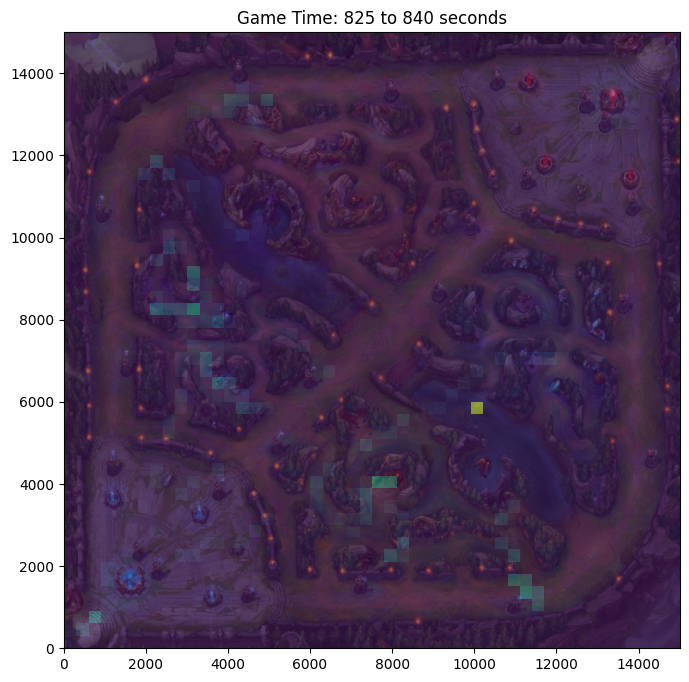

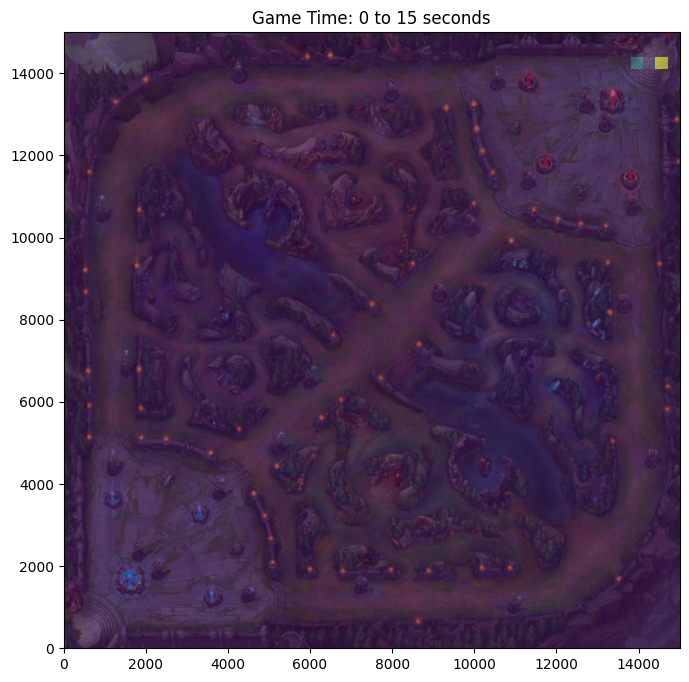

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from google.colab import files

# Read the CSV file
df = pd.read_csv("output.csv")

# Filter data to only include data between 0 and 14 minutes (840 seconds)
df = df[df['game_time'] <= 840 * 1000]

# Separate data for red and blue sides
blue_df = df[df['side'] == 'blue']
red_df = df[df['side'] == 'red']

# Function to update the plot for each time segment
def update(num, ax, df):
    ax.clear()
    img = plt.imread("leagueMap.jpg")
    ax.imshow(img, extent=[0, 15000, 0, 15000])

    time_segment = df[(df['game_time'] >= num * 15 * 1000) & (df['game_time'] < (num + 1) * 15 * 1000)]
    if not time_segment.empty:
        heatmap_data, xedges, yedges = np.histogram2d(time_segment['pos_x'], time_segment['pos_y'], bins=50, range=[[0, 15000], [0, 15000]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        ax.imshow(heatmap_data.T, extent=extent, origin='lower', cmap='viridis', alpha=0.5)
        ax.set_title(f"Game Time: {num * 15} to {(num + 1) * 15} seconds")

# Create and download animations for both sides
for side, side_df in {'blue': blue_df, 'red': red_df}.items():
    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create an animation
    animator = FuncAnimation(fig, update, fargs=(ax, side_df), frames=range(int(840 // 15)), repeat=False)

    # Save the animation
    animation_filename = f'heatmap_animation_{side}.mp4'
    animator.save(animation_filename, writer='ffmpeg', fps=1)

    # Download the animation
    files.download(animation_filename)


In [4]:
import pandas as pd
from google.colab import files

# Replace 'snapshot_player_stats.parquet' with the path to your actual parquet file
parquet_file = 'game_summary.parquet'

# Read the parquet file into a pandas DataFrame
df = pd.read_parquet(parquet_file)

# Convert DataFrame to CSV file
# Replace 'snapshot_player_stats.csv' with your desired CSV file name
csv_file = 'game_summary.csv'
df.to_csv(csv_file, index=False)

# Download the CSV file to your local machine
files.download(csv_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>